<a href="https://colab.research.google.com/github/karinasaidene/Customer-segmentation-using-K-means/blob/main/Customer_segmentation_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

##Data collection and analysis


In [ ]:
#loading the data from csv file to a pandas dataframe
customer_data=pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

In [ ]:
#discover the dataset
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
customer_data.shape


(200, 5)

In [ ]:
#understanding my data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing values


In [ ]:
#choosing the annual income column and spending score column

X = customer_data.iloc[:,[3,4]].values

Choosing the number of clusters

In [ ]:
#findin wcss value for different number of clusters

wcss =[]

for i in range(1,11) :
  kmeans = KMeans(n_clusters= i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

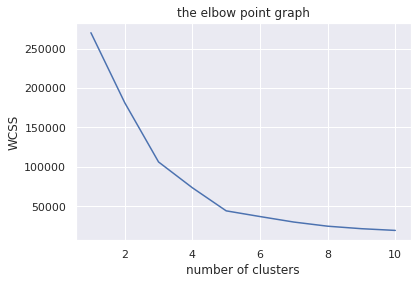

In [ ]:
#plot an elbow graph 

sns.set()
plt.plot(range(1,11) , wcss)
plt.title('the elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

the optimum number of clusters = 5

Training the Kmeans Clustering model 

In [ ]:
kmeans = KMeans(n_clusters=5 , init ='k-means++', random_state=0)
#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

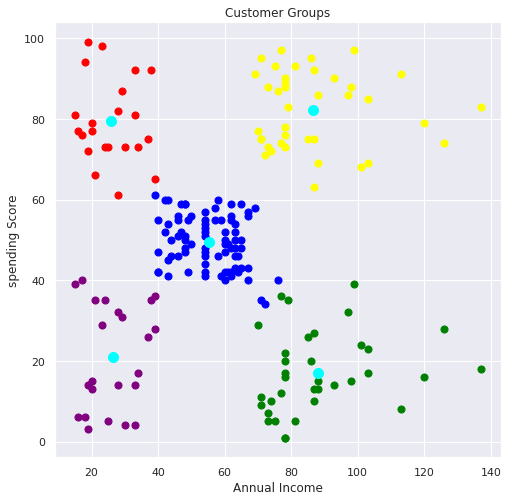

In [ ]:
#plottting all the clusters and their centroids


plt.figure(figsize =(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s= 50 , c='green', label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s= 50 , c='blue', label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s= 50 , c='yellow', label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s= 50 , c='red', label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s= 50 , c='purple', label='cluster5')

 #plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="cyan",label='entroids')

plt.title("Customer Groups")
plt.xlabel('Annual Income')
plt.ylabel('spending Score')
plt.show()